# Distancias

In [1]:
from scipy.spatial import distance_matrix
import pandas as pd

In [2]:
data = pd.read_csv(r'F:/BD/GitHub/mlearningcourse/datasets/movies/movies.csv', sep = ';')

In [3]:
# Valoraciones que le han dado a cada película
data.head()

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6


In [4]:
# Seleccionar únicamente las columnas de las películas, y quitar el User ID
movies = data.columns.values.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

## Calcular la matriz de distancias

* Entre mayor sea el índice "P", serán menores las distancias
* distance_matrix

In [5]:
# Este cálculo da como resultado un ARRAY   --- P representa las distancias

dd1 = distance_matrix(data[movies], data[movies], p = 1)   # Distancia de Manhatan
dd2 = distance_matrix(data[movies], data[movies], p = 2)   # Distancia Euclídea
dd10 = distance_matrix(data[movies], data[movies], p = 10)   # Distancia con 10

In [6]:
dd1

array([[ 0. ,  9.9, 15.9,  9.1,  4.2,  6.9, 10.5,  7.4,  5.6,  0.7],
       [ 9.9,  0. , 12.4, 17.2,  6.1,  6.2,  0.8,  4.9, 11.7,  9.6],
       [15.9, 12.4,  0. , 12.4, 18.5,  9. , 12. , 17.3, 12.9, 15.2],
       [ 9.1, 17.2, 12.4,  0. , 12.7, 11. , 18. , 15.3,  5.5,  8.8],
       [ 4.2,  6.1, 18.5, 12.7,  0. ,  9.5,  6.5,  3.2,  8.2,  3.9],
       [ 6.9,  6.2,  9. , 11. ,  9.5,  0. ,  7. ,  8.3,  5.5,  6.2],
       [10.5,  0.8, 12. , 18. ,  6.5,  7. ,  0. ,  5.3, 12.5, 10.2],
       [ 7.4,  4.9, 17.3, 15.3,  3.2,  8.3,  5.3,  0. ,  9.8,  7.1],
       [ 5.6, 11.7, 12.9,  5.5,  8.2,  5.5, 12.5,  9.8,  0. ,  4.9],
       [ 0.7,  9.6, 15.2,  8.8,  3.9,  6.2, 10.2,  7.1,  4.9,  0. ]])

#### Pasar los arrays a dataframe

In [7]:
# Crear función para transformar arrays en dataframe
             # Array  # Nombre de la columna
def dm_to_df(dd, col_name):
    import pandas as pd
    return pd.DataFrame(dd, index = col_name, columns = col_name)

#### Primera matriz de distancias (Manhattan)

In [8]:
# data['user_id']   <--- Hace referencia al data frame al que debemos pegarle el array

dm_to_df(dd1,data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


###### Lectura 1a matríz
* El usuario 3, con respecto al 1, están a 15.9 de distancia.

#### Segunda matríz de distancias (euclidea)

In [9]:
# data['user_id']   <--- Hace referencia al data frame al que debemos pegarle el array

dm_to_df(dd2,data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


###### Lectura 2a matríz (euclídea)
* El usuario 3, con respecto al 1, están a 10.14 de distancia.

#### Distancia 10

In [10]:
# data['user_id']   <--- Hace referencia al data frame al que debemos pegarle el array

dm_to_df(dd10,data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


###### Lectura 3a matríz (10)
* El usuario 3, con respecto al 1, están a 7.87 de distancia.

#### Al aumentar P, las distancias se reducen.

## Representación gráfica

#### Importación de librerías para gráficos 3D

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##### Scatterplot

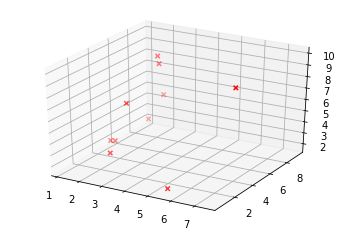

In [12]:
# Crea la figura
fig = plt.figure()

# El triple 1, representa 3 dimensiones
# Gráfico creado

ax = fig.add_subplot(111, projection = '3d')

# XS representa eje X
# YS representa ejes y
# ZS representa eje z

ax.scatter(xs = data['star_wars'], 
          ys = data['lord_of_the_rings'], 
          zs = data['harry_potter'], color = 'r',
          marker='x')


## Clustering jerárquico
* Método aglomerativo (ascendente  -  Tantos clústers, cómo individuos)
* Método disociativo  (descendente -  Tantos clústers, cómo casos tratados)

### 1. Enlaces [Método manual] 
* Consiste en ir eliminando las columnas y filas que tienen las menores distancias, para después construir un *array*

In [88]:
df_en = dm_to_df(dd1,data['user_id'])
df_en

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


#### Creación de lista

In [89]:
# Crear una lista vacía
Z = []

In [90]:
# Crear una nueva columna, sumando el valor de columna 2 (índice1) + columna 11 (índice 10)
df_en[11] = df_en[1]+[10]

# Buscar el valor de cada posición y sumarlo
df_en.loc[11] = df_en.loc[1]+df_en.loc[10]

# Agregar a la lista Z
# columna1, columna10, distancias es de 0.7, y se unieron 2 puntos
Z.append([1 , 10 , 0.7 , 2])  # id1, id2, d, n_elementos_en_cluster
# Se toman estas coordenadas, porque son las que tienen menor distancia (0.7)


df_en                           

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,10.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.9
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,25.9
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,19.1
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,14.2
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,16.9
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.5
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,17.4
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,15.6


In [91]:
# Reemplazar los valores de la fila y columna 11 (indice 12) con el valor mínimo entre columna
# y fila 1 y 10

for i in df_en.columns.values.tolist():
    df_en.loc[11][i] = min(df_en.loc[1][i], df_en.loc[10][i])
    df_en.loc[i][11] = min(df_en.loc[i][1], df_en.loc[i][10])
df_en

# Se re hace la matriz de distancias

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


In [92]:
# Eliminar las columnas 1 y 10, por que aparece el mínimo en la columna 11

# Nuevo dataframe, eliminando columnas 1 y 10
df_en =  df_en.drop([1,10])   #<-- Para eliminar las columnas
df_en =  df_en.drop([1,10], axis = 1)  #<--- Para eliminar los índices del dataframe creado arriba

df_en

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
11,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


#### Recalcular utilizando las columnas de distancias mínimas

In [93]:

# Sustituir las variables creadas
x = 2
y = 7


n = 12 # Fila a crear


df_en[n] = df_en[x]+[y]

# Buscar el valor de cada posición y sumarlo
df_en.loc[n] = df_en.loc[x]+df_en.loc[y]

# Agregar a la lista Z

Z.append([x , i , df_en.loc[x][y] , 2])  # id1, id2, d, n_elementos_en_cluster



for i in df_en.columns.values.tolist():
    df_en.loc[n][i] = min(df_en.loc[x][i], df_en.loc[y][i])
    df_en.loc[i][n] = min(df_en.loc[i][x], df_en.loc[i][y])


df_en =  df_en.drop([x,y])   #<-- Para eliminar las columnas
df_en =  df_en.drop([x,y], axis = 1)  #<--- Para eliminar los índices del dataframe creado arriba

df_en


user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.0,12.4,18.5,9.0,17.3,12.9,15.2,12.0
4,12.4,0.0,12.7,11.0,15.3,5.5,8.8,17.2
5,18.5,12.7,0.0,9.5,3.2,8.2,3.9,6.1
6,9.0,11.0,9.5,0.0,8.3,5.5,6.2,6.2
8,17.3,15.3,3.2,8.3,0.0,9.8,7.1,4.9
9,12.9,5.5,8.2,5.5,9.8,0.0,4.9,11.7
11,15.2,8.8,3.9,6.2,7.1,4.9,0.0,9.6
12,12.0,17.2,6.1,6.2,4.9,11.7,9.6,0.0


#### Seguir eliminando variables para formar nuevas con el mínimo

#### Clúster 13

In [94]:

# Sustituir las variables creadas
x = 5        # <----------------- filas con menor distancia en df anterior
y = 8


n = 13 # Fila a crear


df_en[n] = df_en[x]+[y]

# Buscar el valor de cada posición y sumarlo
df_en.loc[n] = df_en.loc[x]+df_en.loc[y]

# Agregar a la lista Z

Z.append([x , i , df_en.loc[x][y] , 2])  # id1, id2, d, n_elementos_en_cluster



for i in df_en.columns.values.tolist():
    df_en.loc[n][i] = min(df_en.loc[x][i], df_en.loc[y][i])
    df_en.loc[i][n] = min(df_en.loc[i][x], df_en.loc[i][y])


df_en =  df_en.drop([x,y])   #<-- Para eliminar las columnas
df_en =  df_en.drop([x,y], axis = 1)  #<--- Para eliminar los índices del dataframe creado arriba

df_en


user_id,3,4,6,9,11,12,13
user_id,,,,,,,
3,0.0,12.4,9.0,12.9,15.2,12.0,17.3
4,12.4,0.0,11.0,5.5,8.8,17.2,12.7
6,9.0,11.0,0.0,5.5,6.2,6.2,8.3
9,12.9,5.5,5.5,0.0,4.9,11.7,8.2
11,15.2,8.8,6.2,4.9,0.0,9.6,3.9
12,12.0,17.2,6.2,11.7,9.6,0.0,4.9
13,17.3,12.7,8.3,8.2,3.9,4.9,0.0


#### Clúster 14

In [95]:
# Sustituir las variables creadas
x = 11       # <----------------- filas con menor distancia en df anterior
y = 13


n = 14 # Fila a crear


df_en[n] = df_en[x]+[y]

# Buscar el valor de cada posición y sumarlo
df_en.loc[n] = df_en.loc[x]+df_en.loc[y]

# Agregar a la lista Z

Z.append([x , i , df_en.loc[x][y] , 2])  # id1, id2, d, n_elementos_en_cluster



for i in df_en.columns.values.tolist():
    df_en.loc[n][i] = min(df_en.loc[x][i], df_en.loc[y][i])
    df_en.loc[i][n] = min(df_en.loc[i][x], df_en.loc[i][y])


df_en =  df_en.drop([x,y])   #<-- Para eliminar las columnas
df_en =  df_en.drop([x,y], axis = 1)  #<--- Para eliminar los índices del dataframe creado arriba

df_en


user_id,3,4,6,9,12,14
user_id,,,,,,
3,0.0,12.4,9.0,12.9,12.0,15.2
4,12.4,0.0,11.0,5.5,17.2,8.8
6,9.0,11.0,0.0,5.5,6.2,6.2
9,12.9,5.5,5.5,0.0,11.7,4.9
12,12.0,17.2,6.2,11.7,0.0,4.9
14,15.2,8.8,6.2,4.9,4.9,0.0


####  Clúster 15 (juntar 3 elementos [9,12,14]) - no aparece el último en el array

In [96]:
# Sustituir las variables creadas
x = 9       # <----------------- filas con menor distancia en df anterior
y = 12
z = 14

n = 15 # Fila a crear


df_en[n] = df_en[x]+[y]

# Buscar el valor de cada posición y sumarlo
df_en.loc[n] = df_en.loc[x]+df_en.loc[y]

# Agregar a la lista Z

Z.append([x , i , df_en.loc[x][y] , 3] ) # <--- Se cambiar el número de elementos a añadir



for i in df_en.columns.values.tolist():
    df_en.loc[n][i] = min(df_en.loc[x][i], df_en.loc[y][i], df_en.loc[z][i])
    df_en.loc[i][n] = min(df_en.loc[i][x], df_en.loc[i][y], df_en.loc[i][z])


df_en =  df_en.drop([x,y,z])   #<-- Para eliminar las columnas
df_en =  df_en.drop([x,y,z], axis = 1)  #<--- Para eliminar los índices del dataframe creado arriba

df_en


user_id,3,4,6,15
user_id,,,,
3,0.0,12.4,9.0,12.0
4,12.4,0.0,11.0,5.5
6,9.0,11.0,0.0,5.5
15,12.0,5.5,5.5,0.0


#### Clúster 16

In [97]:
# Sustituir las variables creadas
x = 4      # <----------------- filas con menor distancia en df anterior
y = 6
z = 15

n = 16 # Fila a crear


df_en[n] = df_en[x]+[y]

# Buscar el valor de cada posición y sumarlo
df_en.loc[n] = df_en.loc[x]+df_en.loc[y]

# Agregar a la lista Z

Z.append([x , i , df_en.loc[x][y] , 3] ) # <--- Se cambiar el número de elementos a añadir



for i in df_en.columns.values.tolist():
    df_en.loc[n][i] = min(df_en.loc[x][i], df_en.loc[y][i], df_en.loc[z][i])
    df_en.loc[i][n] = min(df_en.loc[i][x], df_en.loc[i][y], df_en.loc[i][z])


df_en =  df_en.drop([x,y,z])   #<-- Para eliminar las columnas
df_en =  df_en.drop([x,y,z], axis = 1)  #<--- Para eliminar los índices del dataframe creado arriba

df_en


user_id,3,16
user_id,,
3,0.0,9.0
16,9.0,0.0


#### Clúster 17

In [98]:
# Sustituir las variables creadas
x = 3       # <----------------- filas con menor distancia en df anterior
y = 16


n = 17 # Fila a crear


df_en[n] = df_en[x]+[y]

# Buscar el valor de cada posición y sumarlo
df_en.loc[n] = df_en.loc[x]+df_en.loc[y]

# Agregar a la lista Z

Z.append([x , i , df_en.loc[x][y] , 2])  # id1, id2, d, n_elementos_en_cluster



for i in df_en.columns.values.tolist():
    df_en.loc[n][i] = min(df_en.loc[x][i], df_en.loc[y][i])
    df_en.loc[i][n] = min(df_en.loc[i][x], df_en.loc[i][y])


df_en =  df_en.drop([x,y])   #<-- Para eliminar las columnas
df_en =  df_en.drop([x,y], axis = 1)  #<--- Para eliminar los índices del dataframe creado arriba

df_en

user_id,17
user_id,
17,0.0


#### Todas las uniones que se hicieron en Z append

In [99]:
# Clústers en cada array (ejemplo, el 1 y el 10 tienen las menores distancias)

Z # <---- Faltan los valores eliminados [z]

[[1, 10, 0.7, 2],
 [2, 11, 0.7999999999999994, 2],
 [5, 12, 3.2, 2],
 [11, 13, 3.900000000000001, 2],
 [9, 14, 11.7, 3],
 [4, 15, 11.0, 3],
 [3, 16, 9.0, 2]]

# Clústering jerárquico con Python
* Método automático

#### Importación de librerías

In [102]:
import matplotlib.pyplot as plt  # para representaciones de los gráficos
from scipy.cluster.hierarchy import dendrogram, linkage  # para hacer enlaces y dendogramas

##### Traer las columnas del dataset (movies)

In [103]:
movies # Nombres de las variables que deseamos utilizar

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [106]:
# Traer las columnas elegidas (movies) del dataset

data[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


#### Función "linkage"

In [108]:
Z = linkage(data[movies], 'ward')   # <- Método 'ward' de la función 'linkage'
                                    # Minimiza el cuadrado de las diferencias 
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

* Acomoda los valores en enlaces:
   * ejemplo: El 0 y el 9, con distancia de 0.41231056, 2 elementos unidos.

#### Creación de un dendrograma método ward

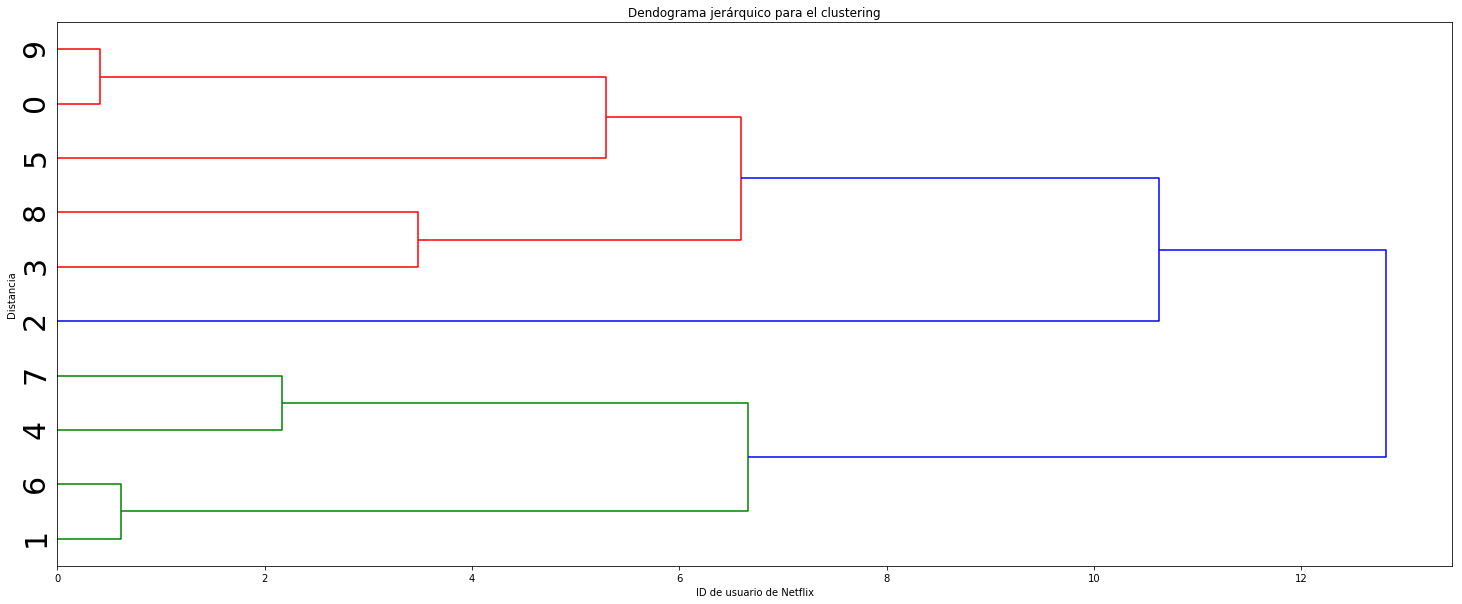

In [123]:
Z = linkage(data[movies], 'ward')
plt.figure(figsize = (25,10))   # Tamaño
plt.title('Dendograma jerárquico para el clustering')  #Título
plt.xlabel('ID de usuario de Netflix')   # Eje x etiqueta
plt.ylabel('Distancia')  # Eje y etiqueta

# Función 'dendrogram' -- rotamos las etiquetas
dendrogram(Z, leaf_rotation= 90.,
            leaf_font_size = 30, 
             orientation = 'right')   # Crea dendograma con la matriz de enlaces
                                      # Podemos quitar la orientacipon para que quede vertical
                
plt.show()

#### Creación de un dendrograma método average

In [124]:
Z = linkage(data[movies], 'average')
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 8.        , 10.        ,  3.46355712,  3.        ],
       [ 5.        , 13.        ,  4.37331672,  4.        ],
       [11.        , 12.        ,  4.75772945,  4.        ],
       [ 3.        , 14.        ,  5.51984068,  5.        ],
       [15.        , 16.        ,  6.87496749,  9.        ],
       [ 2.        , 17.        ,  8.78305268, 10.        ]])

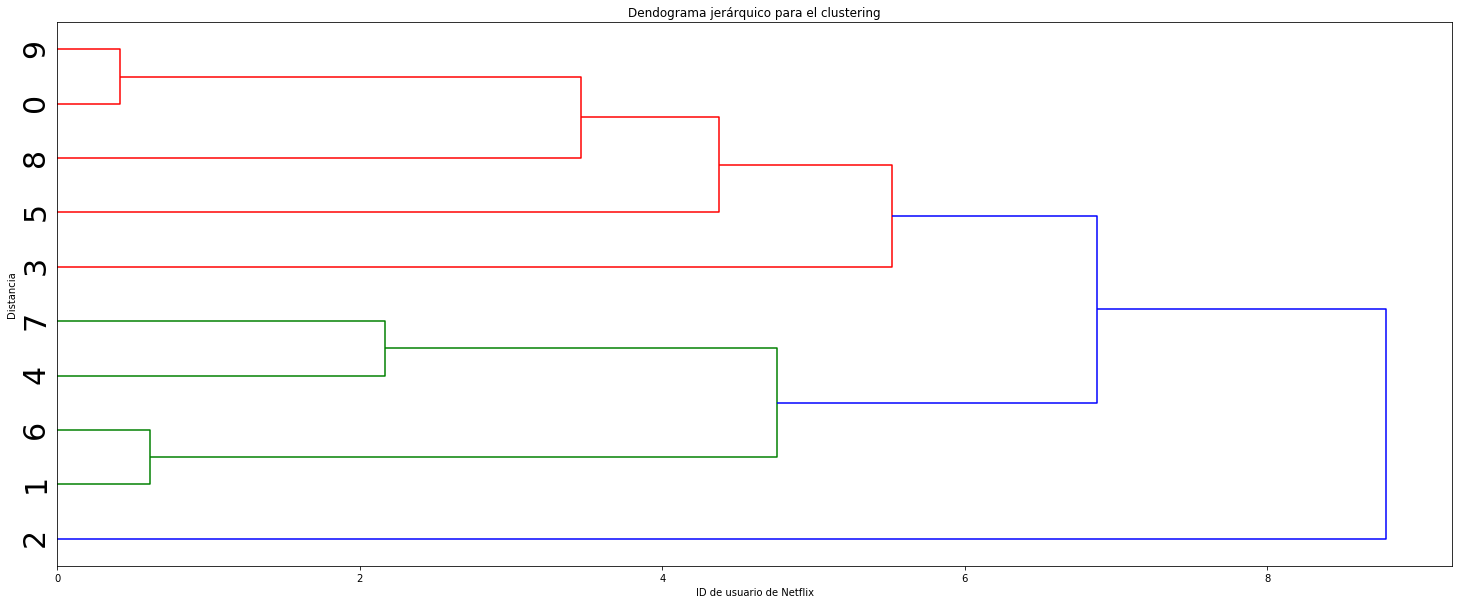

In [122]:
Z = linkage(data[movies], 'average')
plt.figure(figsize = (25,10))   # Tamaño
plt.title('Dendograma jerárquico para el clustering')  #Título
plt.xlabel('ID de usuario de Netflix')   # Eje x etiqueta
plt.ylabel('Distancia')  # Eje y etiqueta

# Función 'dendrogram' -- rotamos las etiquetas
dendrogram(Z, leaf_rotation= 90.,
            leaf_font_size = 30, 
             orientation = 'right')   # Crea dendograma con la matriz de enlaces
                                      # Podemos quitar la orientacipon para que quede vertical
                
plt.show()

#### Creación de un dendrograma método 'complete'

In [125]:
Z = linkage(data[movies], 'complete')
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  4.74236228,  3.        ],
       [11.        , 12.        ,  5.92199291,  4.        ],
       [13.        , 14.        ,  6.47610994,  5.        ],
       [ 2.        , 16.        , 10.14347081,  6.        ],
       [15.        , 17.        , 10.82312339, 10.        ]])

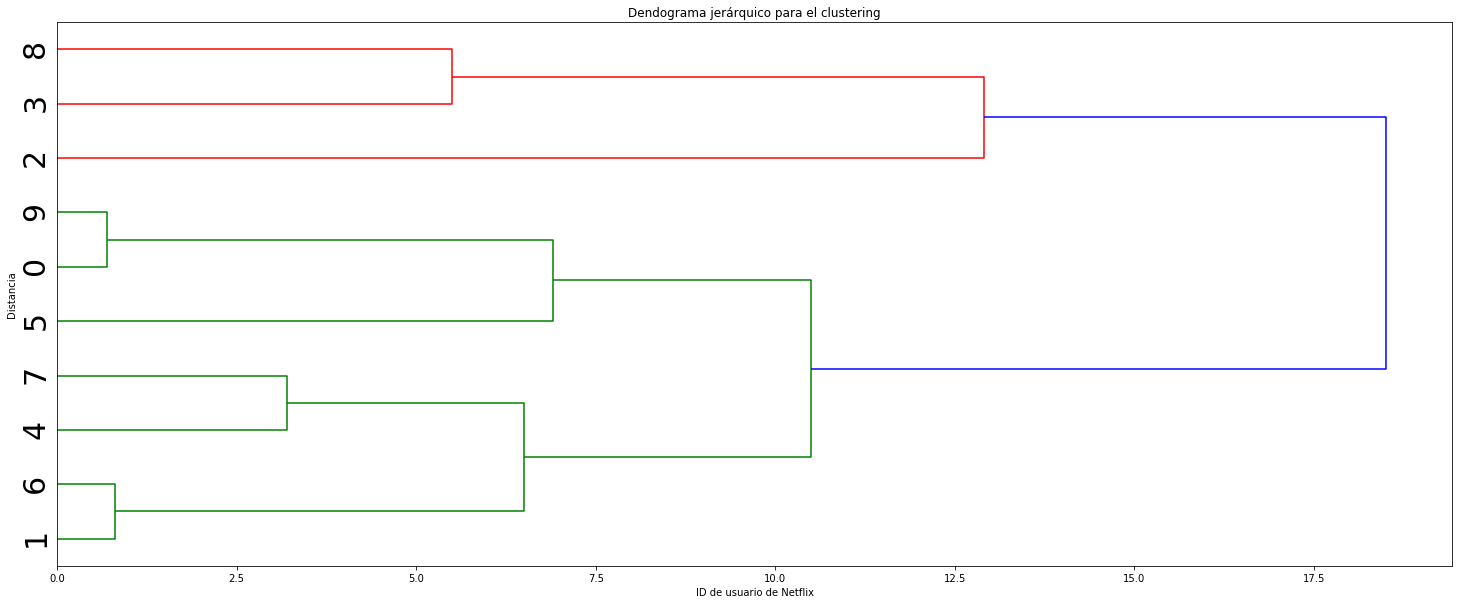

In [137]:
Z = linkage(data[movies], method = 'complete',  # <--- Se especifica el método
           metric = 'cityblock')    # <--------- Se especifíca la métrica para calcular distancias


plt.figure(figsize = (25,10))   # Tamaño
plt.title('Dendograma jerárquico para el clustering')  #Título
plt.xlabel('ID de usuario de Netflix')   # Eje x etiqueta
plt.ylabel('Distancia')  # Eje y etiqueta

# Función 'dendrogram' -- rotamos las etiquetas
dendrogram(Z, leaf_rotation= 90.,
            leaf_font_size = 30, 
             orientation = 'right')   # Crea dendograma con la matriz de enlaces
                                      # Podemos quitar la orientacipon para que quede vertical
                
plt.show()